<a href="https://colab.research.google.com/github/HarshRajGupta22/Practicse-Projects/blob/main/Advertising_Sales_Channel_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADVERTISING

Advertising is a marketing communication that employs an openly sponsored, non-personal message to promote or sell a product, service or idea.[1]: 465  Sponsors of advertising are typically businesses wishing to promote their products or services. Advertising is differentiated from public relations in that an advertiser pays for and has control over the message. It differs from personal selling in that the message is non-personal, i.e., not directed to a particular individual. Advertising is communicated through various mass media,[2] including traditional media such as newspapers, magazines, television, radio, outdoor advertising or direct mail; and new media such as search results, blogs, social media, websites or text messages. The actual presentation of the message in a medium is referred to as an advertisement

# Data Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Loading Dataset

In [1]:
import pandas as pd
import numpy as np
path ='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'
df = pd.read_csv(path)

In [2]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Details About the Columns

1. Tv

This column contains the details about the Adevirtement through Television

2. Radio

This column contains the details about the Adevirtement through Radio

3. NewsPaper

This column contains the details about the Adevirtement through Newspaper

4. Sales

This column contains the details about the Total Sales through all the media

# Checking for the Columns containing Null , Blank Or Empty Values

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Checking the presence of NULL BLANK or EMPTY VALUES through HeatMap

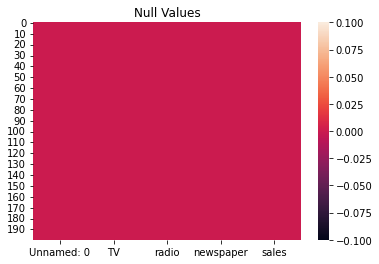

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We Can see that the from following that no Null Values are present in the dataset 

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We can see that all the datas are in float format which is good

# EDA

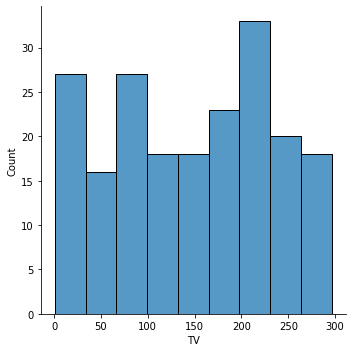

In [13]:
sns.displot(df['TV'])

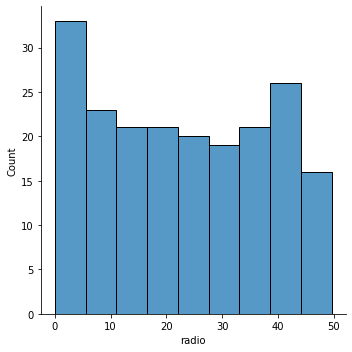

In [16]:
sns.displot(df['radio'],kind='hist')

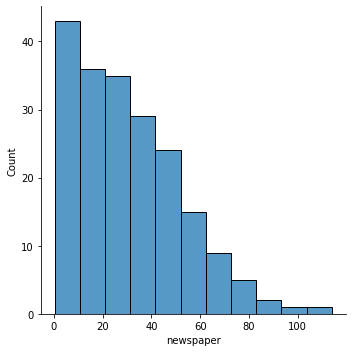

In [17]:
sns.displot(df['newspaper'],kind='hist')

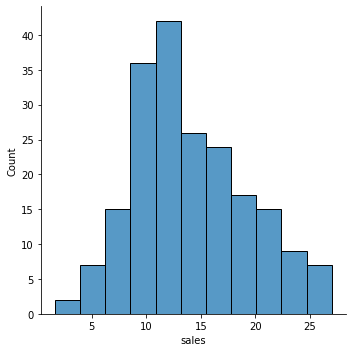

In [19]:
sns.displot(df['sales'],kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f580a545dd0>,
      dtype=object)

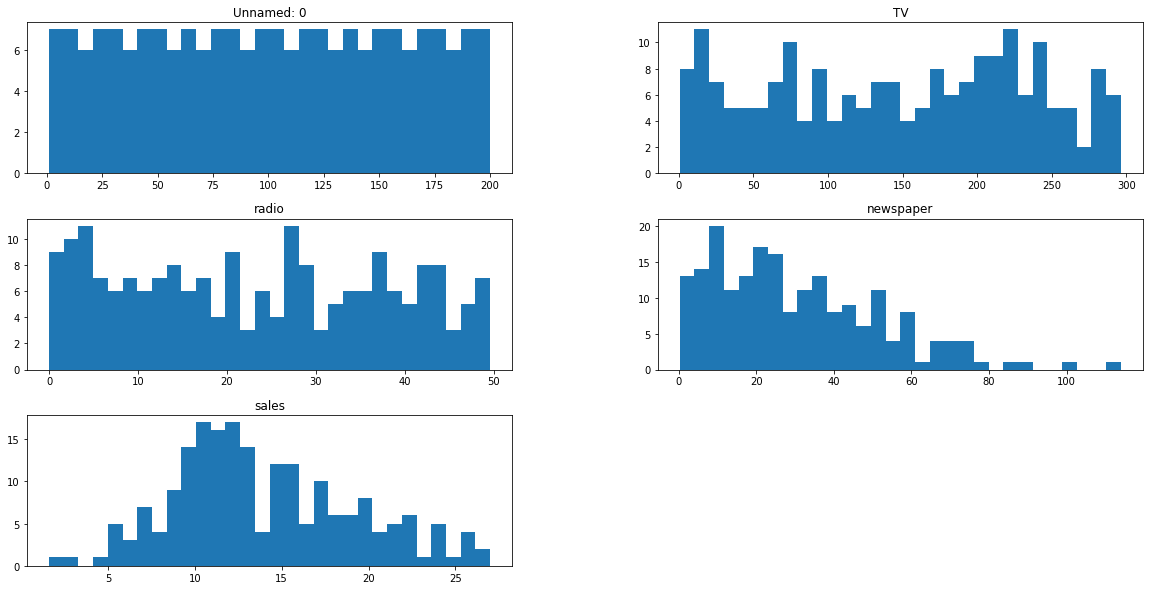

In [21]:
df.hist(figsize=(20,10), grid=False, layout=(3,2), bins = 30)

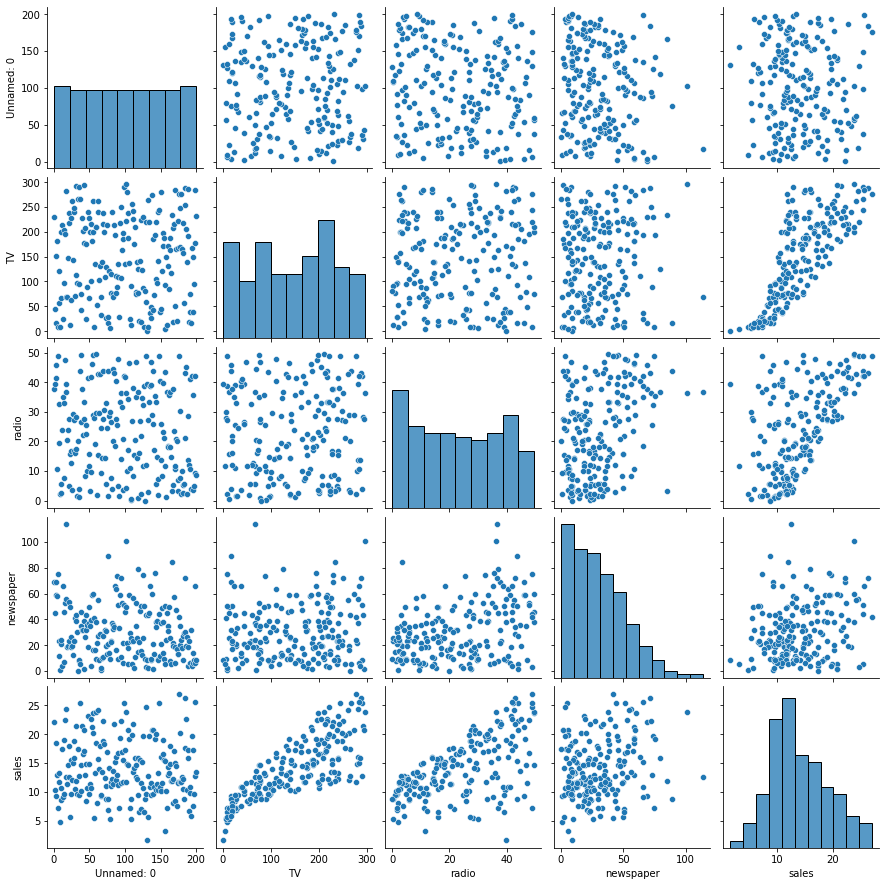

In [22]:
sns.pairplot(df)

# Coorelation

In [23]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [24]:
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

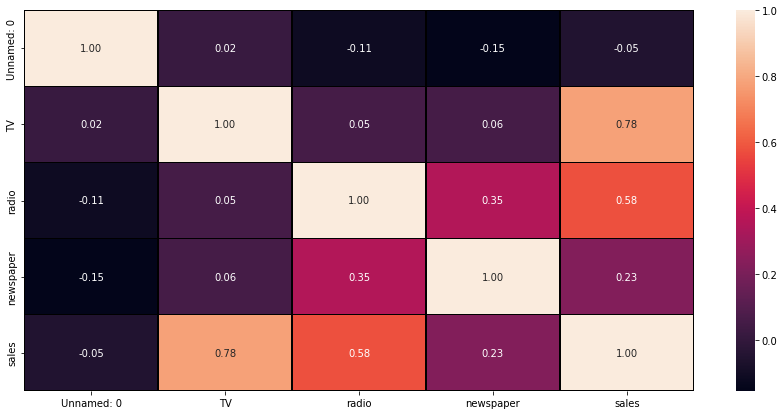

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

Removing Columns that are not related to the dataset

In [27]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Descriptive Statistics

In [28]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


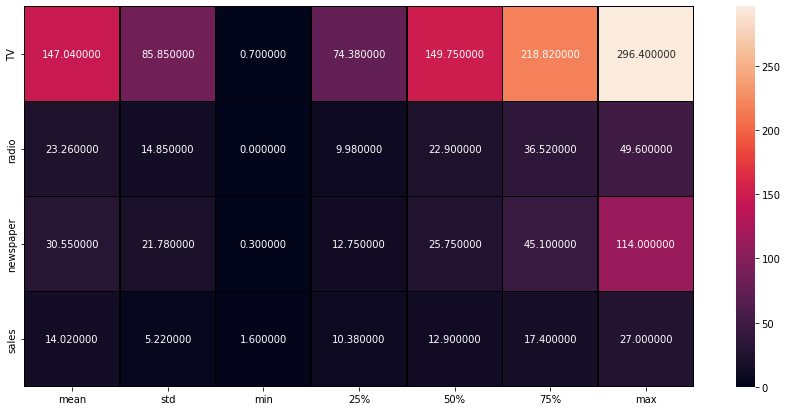

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

OUTCOME OF DESCRIPTIVE STATISTICS..

1. 

# Checking Data To Remove Skewness

In [30]:
df.iloc[:,:-1]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
df.iloc[:,:-1].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

Removing Skewness Using Power Transform

In [32]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [33]:
df.iloc[:,:-1].skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

# OUTLIERS CHECKING

TV              AxesSubplot(0.125,0.657941;0.352273x0.222059)
radio        AxesSubplot(0.547727,0.657941;0.352273x0.222059)
newspaper       AxesSubplot(0.125,0.391471;0.352273x0.222059)
sales        AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

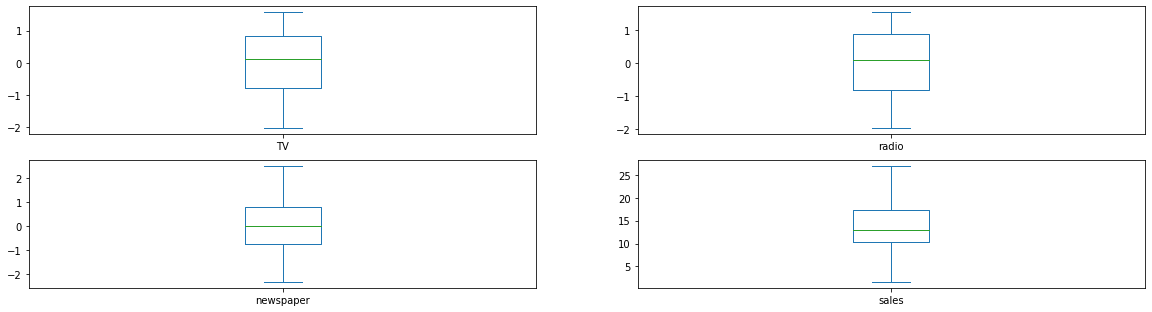

In [34]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,2), figsize=[20,8])

We can see that there are no outliers present in the dataset

# Feature Engineering ( Variantion Inflation Factor )

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.047479,0.041693,0.788695
radio,0.047479,1.000000,0.291462,0.570964
newspaper,0.041693,0.291462,1.000000,0.198977
sales,0.788695,0.570964,0.198977,1.000000


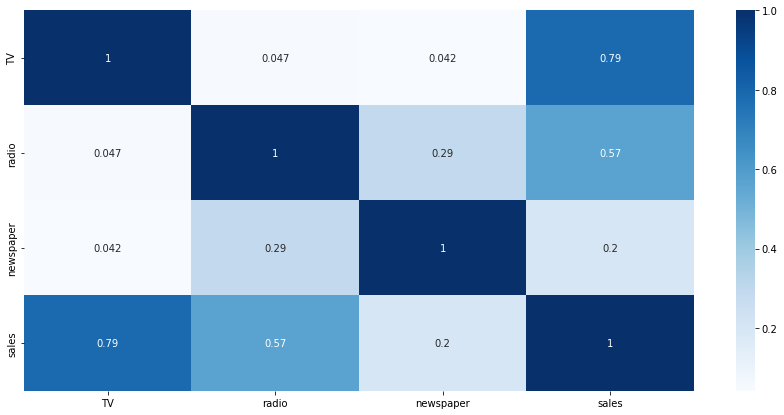

In [37]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [39]:
# independent Column
x=df.iloc[:,:-1]
# target
y=df.iloc[:,-1]

In [40]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [41]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [42]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [43]:
vif_calc()

   VIF Factor   features
0    1.003112         TV
1    1.094332      radio
2    1.093766  newspaper


We can see taht there in no variance inflation in the Dataset

# Scaling the Data

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

# As the Outcome is Price Value which is in Float So we use Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
  print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
  print("\n")

At random state 1,the training accuracy is :- 90.71938747219684
At random state 1,the testing accuracy is :- 89.62223515318661


At random state 2,the training accuracy is :- 91.83341288802332
At random state 2,the testing accuracy is :- 81.34661880809733


At random state 3,the training accuracy is :- 90.44922374546076
At random state 3,the testing accuracy is :- 91.76823268482114


At random state 4,the training accuracy is :- 90.58334490016561
At random state 4,the testing accuracy is :- 89.99332568068064


At random state 5,the training accuracy is :- 90.57996837685972
At random state 5,the testing accuracy is :- 91.11155103873196


At random state 6,the training accuracy is :- 90.31637800959938
At random state 6,the testing accuracy is :- 92.63228920019166


At random state 7,the training accuracy is :- 90.24328978288426
At random state 7,the testing accuracy is :- 92.29594391045336


At random state 8,the training accuracy is :- 91.61168555487973
At random state 8,the testing acc

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

# Linear Regression

In [47]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [12.86787808 10.12792407 17.42486532  6.6777674   9.57484826 11.79622808
 19.42255585 10.42904847 16.19284893 15.09346009  9.98557565 14.23909563
 16.6074724  17.41930172  8.95294381 22.9747748   8.77908638 13.92306952
 10.07128127 12.23280279 18.22601968 12.72966701 18.55415765 20.61428156
 13.91030029 14.01228954 11.47451807 23.50141965  9.77789755 14.40451074
 19.91617674  9.37266723 19.79871831 20.93091447 18.38604045 20.87815832
  6.67850619 15.50878929 19.98348018  6.08179799]
actual result 179    12.6
166     8.0
187    17.3
119     6.6
186    10.3
134    10.8
142    20.1
12      9.2
118    15.9
178    11.8
138     9.6
43     12.9
194    17.3
11     17.4
44      8.5
101    23.8
49      9.7
4      12.9
149    10.1
31     11.9
188    15.9
116    12.2
33     17.4
0      22.1
181    12.2
161    13.3
2       9.3
183    26.2
125    10.6
81     12.3
176    20.2
145    10.3
124    19.7
55     23.7
153    19.0
137    20.8
182     8.7
156    15.3
104    20.7
106     7.2


In [49]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean Absolute Error : 1.0096684382685588
Mean Squared Error : 1.7257417769080319
Root mean Squared Error 1.3136749129476561
r2 score : 93.38858948468285


# Decission Tree Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
pred=dtr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [14.5  8.8 18.4  7.  10.1 10.4 19.6  8.8 16.  12.7 10.1 12.2 15.  17.1
  6.9 22.2  9.7 14.1 10.1 11.9 16.1 12.9 16.1 22.4 12.2 12.5  8.7 25.5
  9.7 11.9 18.  10.5 19.6 23.8 18.5 20.2  8.1 13.6 19.6  6.9]
actual result 179    12.6
166     8.0
187    17.3
119     6.6
186    10.3
134    10.8
142    20.1
12      9.2
118    15.9
178    11.8
138     9.6
43     12.9
194    17.3
11     17.4
44      8.5
101    23.8
49      9.7
4      12.9
149    10.1
31     11.9
188    15.9
116    12.2
33     17.4
0      22.1
181    12.2
161    13.3
2       9.3
183    26.2
125    10.6
81     12.3
176    20.2
145    10.3
124    19.7
55     23.7
153    19.0
137    20.8
182     8.7
156    15.3
104    20.7
106     7.2
Name: sales, dtype: float64


In [52]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean Absolute Error : 0.7049999999999998
Mean Squared Error : 0.8639999999999997
Root mean Squared Error 0.9295160030897799
r2 score : 96.6899690546586


# Regularization

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [54]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

90.15581613836716

ENSEMBLE TECHNIQUE

In [55]:
from sklearn.ensemble import RandomForestRegressor
Rrf=RandomForestRegressor()

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
clf = GridSearchCV(Rrf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [56]:
from sklearn.model_selection import cross_val_score

Rrf= RandomForestRegressor(criterion="mae",max_features="auto")
Rrf.fit(x_train,y_train)
Rrf.score(x_train,y_train)
pred_decession = Rrf.predict(x_test)

rfs = r2_score(y_test,pred_decession)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(Rrf,x,y,cv=5)
rfc=rfscore.mean()
print('cross Val Score :',rfc*100)

R2 Score : 97.94486499843407
cross Val Score : 97.6651345050721


# Saving the Best Model

In [57]:
import pickle
filename = 'Advertising Sales Channel Prediction.pkl'
pickle.dump(Rrf,open(filename,'wb'))